In [1]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
lines = []
with open("/Users/anokhin/Desktop/targets_201510_H.txt") as tarf:
    for line in tarf:
        uid, json_str = line.strip().split("\t")        
        data = {"uid": "H:" + uid}
        for feature, value in ujson.loads(json_str):
            data[feature] = value
            
        lines.append(data)
        
#         if len(lines) > 100:
#             break
        
df = pd.DataFrame(lines).set_index(['uid']).fillna(0)
df.shape

In [5]:
targets_df = pd.read_csv('/Users/anokhin/Desktop/target.txt').set_index(['uid'])

merged_df = pd.merge(df, targets_df, how='right', left_index=True, right_index=True)
merged_df.head()

,A:10012,A:10013,A:10014,A:10015,A:10053,A:10249,A:10251,A:10252,A:10254,A:10255,...,inc:3,inc:4,inc:5,is_male:False,is_male:True,ltv:1,ltv:2,ltv:3,mean,price
uid,,,,,,,,,,,,,,,,,,,,,
H:569063897023,0,0,0,7,0,0,0,0,0,0,...,0,0,0,7,0,0,7,0,4.313725,440
H:187495552331,0,0,0,0,0,0,0,0,0,0,...,2,1,0,2,0,2,0,1,1.000000,1
H:574172178997,0,0,0,1,0,1,0,0,0,0,...,6,0,0,7,0,0,4,6,2.000000,2
H:554547925139,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,7,7,0,0,1.000000,16
H:161620709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,4,0,35.000000,35


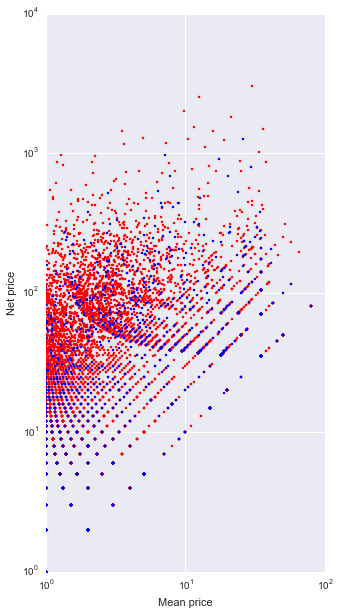

In [6]:
df_part = merged_df.sample(n=10000)
pl.figure(figsize=(5, 10))
pl.plot(df_part[pd.notnull(df_part["A:10012"])]["mean"], df_part[pd.notnull(df_part["A:10012"])]["price"], '.', color='r', markersize=5)
pl.plot(df_part[pd.isnull(df_part["A:10012"])]["mean"], df_part[pd.isnull(df_part["A:10012"])]["price"], '.', color='b', markersize=5)
pl.gca().set_xscale('log')
pl.gca().set_yscale('log')
pl.xlabel("Mean price")
pl.ylabel("Net price")
pl.show()

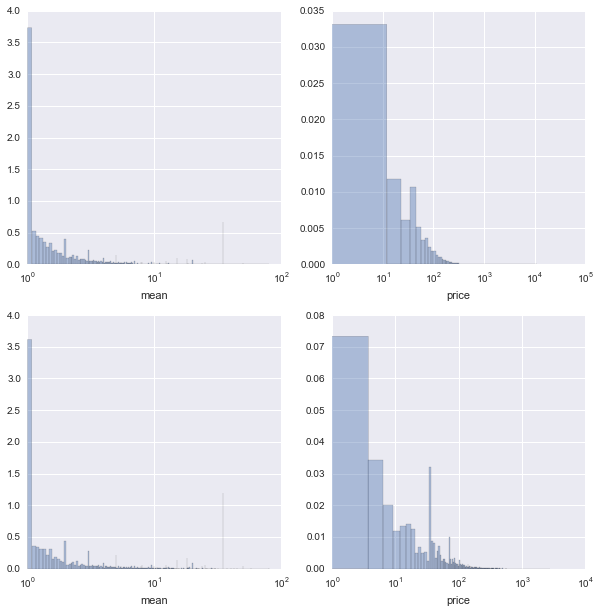

In [7]:
df_part = merged_df.sample(n=100000)
pl.figure(figsize=(10, 10))

df_found = df_part[pd.notnull(df_part["A:10012"])]

ax = pl.subplot(2, 2, 1)
sns.distplot(df_found["mean"], kde=False, norm_hist=True, bins=1000, rug=False)
ax.set_xscale('log')
# ax.set_yscale('log')

ax = pl.subplot(2, 2, 2)
sns.distplot(df_found["price"], kde=False, norm_hist=True, bins=1000, rug=False)
ax.set_xscale('log')
# ax.set_yscale('log')

df_notfound = df_part[pd.isnull(df_part["A:10012"])]

ax = pl.subplot(2, 2, 3)
sns.distplot(df_notfound["mean"], kde=False, norm_hist=True, bins=1000, rug=False)
ax.set_xscale('log')
# ax.set_yscale('log')

ax = pl.subplot(2, 2, 4)
sns.distplot(df_notfound["price"], kde=False, norm_hist=True, bins=1000, rug=False)
ax.set_xscale('log')
# ax.set_yscale('log')

pl.show()

In [8]:
col_counts = pd.Series((merged_df.values > 0).sum(axis=0), index=merged_df.columns.values)
new_cols = sorted(list(col_counts.sort_values(ascending=False)[:302].index))

print merged_df.shape
filtered_df = merged_df[new_cols]
print filtered_df.shape
filtered_df = filtered_df[pd.notnull(filtered_df[new_cols[0]])]
print filtered_df.shape
filtered_df = filtered_df[pd.Series(filtered_df.values[:, :300].sum(axis=1), index=filtered_df.index) >= 5]
print filtered_df.shape

users = list(filtered_df.index)
print users[:5]
features = list(filtered_df.columns.values)
print features[:5]

X = filtered_df.values[:, :300]
ym = filtered_df.values[:, -2]
yp = filtered_df.values[:, -1]

print X[:5]
print ym[:5]
print yp[:5]

filtered_df.head()

(1000000, 338)
(1000000, 302)
(845570, 302)
(835676, 302)
['H:569063897023', 'H:187495552331', 'H:574172178997', 'H:554547925139', 'H:161620709']
[u'A:10012', u'A:10013', u'A:10014', u'A:10015', u'A:10053']
[[ 0.  0.  0. ...,  0.  7.  0.]
 [ 0.  0.  0. ...,  2.  0.  1.]
 [ 0.  0.  0. ...,  0.  4.  6.]
 [ 0.  0.  0. ...,  7.  0.  0.]
 [ 0.  0.  0. ...,  0.  4.  0.]]
[  4.31372549   1.           2.           1.          35.        ]
[ 440.    1.    2.   16.   35.]


,A:10012,A:10013,A:10014,A:10015,A:10053,A:10249,A:10251,A:10252,A:10254,A:10256,...,inc:3,inc:4,inc:5,is_male:False,is_male:True,ltv:1,ltv:2,ltv:3,mean,price
uid,,,,,,,,,,,,,,,,,,,,,
H:569063897023,0,0,0,7,0,0,0,0,0,0,...,0,0,0,7,0,0,7,0,4.313725,440
H:187495552331,0,0,0,0,0,0,0,0,0,0,...,2,1,0,2,0,2,0,1,1.000000,1
H:574172178997,0,0,0,1,0,1,0,0,0,0,...,6,0,0,7,0,0,4,6,2.000000,2
H:554547925139,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,7,7,0,0,1.000000,16
H:161620709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,4,0,35.000000,35


In [14]:
np.savez('/Users/anokhin/Desktop/data.npz', X, ym, yp, users, features)

## Feature selection

In [2]:
data = np.load('/Users/anokhin/Desktop/data.npz')
X = data['arr_0']
ym = data['arr_1']
yp = data['arr_2']
users = data['arr_3']
features = data['arr_4']

In [3]:
import sklearn.pipeline as sl
import sklearn.preprocessing as sp
import sklearn.ensemble as se

model = sl.Pipeline([("bin", sp.Binarizer()), ("rf", se.RandomForestRegressor(oob_score=True, n_jobs=4))])

for b in [1, 5, 10]:
    oob = []
    for n in xrange(10, 210, 100):
        print "Training binarize %d + RF %d" % (b, n)
        model.set_params(bin__threshold=b, rf__n_estimators=n)
        # model.fit(X[:1000], ym[:1000])
        # oob.append(model.named_steps["rf"].oob_score_)
    print "Done: %s" % oob

Training binarize 1 + RF 10
Training binarize 1 + RF 110
Done: []
Training binarize 5 + RF 10
Training binarize 5 + RF 110
Done: []
Training binarize 10 + RF 10
Training binarize 10 + RF 110
Done: []


In [4]:
imp2 = [0.00354704,0.00597413,0.00402758,0.00392772,0.00162307,0.00514089
,0.00355763,0.00057575,0.00228737,0.00090232,0.00081882,0.00335672
,0.00096341,0.00145565,0.00139194,0.00241764,0.00072108,0.00158601
,0.00172084,0.00395084,0.00215077,0.00136429,0.00276913,0.00411615
,0.00101033,0.00190856,0.00063426,0.00100174,0.00309748,0.00241915
,0.00106465,0.00486532,0.00174261,0.00312053,0.00275073,0.00088526
,0.00170943,0.00077723,0.00078415,0.00078051,0.00165497,0.00138034
,0.00059958,0.00089317,0.00419951,0.00184251,0.00147764,0.00686878
,0.00494813,0.00511833,0.00074834,0.00080446,0.0006646,0.00070307
,0.00078656,0.00099918,0.00115216,0.00109287,0.00175562,0.00062816
,0.00053505,0.00069822,0.00076808,0.00044627,0.00078708,0.00152048
,0.00118613,0.00375198,0.00851023,0.00824994,0.00273833,0.00359676
,0.00671383,0.0030389,0.00341852,0.00298976,0.00460216,0.00215912
,0.00240757,0.00419559,0.00233671,0.00285895,0.00332059,0.00369511
,0.00132072,0.00200237,0.00354631,0.00344525,0.00240267,0.00497633
,0.00236067,0.00096471,0.0045828,0.00338209,0.00477139,0.0063044
,0.00197828,0.0014966,0.00152211,0.00174787,0.002426,0.0017842
,0.00279605,0.0032908,0.00194154,0.0067282,0.00752218,0.00187772
,0.00450822,0.00282952,0.00384402,0.00085789,0.00882954,0.00470886
,0.00130064,0.00174286,0.00216702,0.00242448,0.00104337,0.00260822
,0.00125515,0.00503067,0.00441371,0.00088264,0.00208118,0.00492475
,0.00821452,0.00329228,0.00622494,0.00334853,0.00489361,0.00160022
,0.00629918,0.00562915,0.0021253,0.00593253,0.00175906,0.00208974
,0.00229558,0.0102868,0.00282306,0.00101519,0.00125415,0.0028315
,0.00246377,0.00308315,0.00156617,0.00232625,0.0024971,0.00101564
,0.00574249,0.00803682,0.00212613,0.00245481,0.00348626,0.00470894
,0.00489698,0.00290174,0.00219289,0.0033895,0.00657529,0.00370373
,0.00196398,0.00526103,0.00824348,0.00180584,0.00588121,0.00345027
,0.00505124,0.00162401,0.00217763,0.00165445,0.00162587,0.00130366
,0.00533948,0.00846731,0.00222494,0.00339605,0.00301863,0.00297211
,0.00340387,0.00252779,0.0051772,0.00500705,0.00244832,0.00592849
,0.00963731,0.00199528,0.00475482,0.00507154,0.00272588,0.00421401
,0.00533427,0.00072063,0.00642078,0.00525875,0.00659847,0.00495059
,0.00148893,0.00384477,0.00272998,0.00612018,0.00451148,0.0047713
,0.00260221,0.00180089,0.00110495,0.00791709,0.00412136,0.00252414
,0.00466631,0.00214512,0.00246929,0.00081613,0.00188618,0.00186832
,0.00573152,0.00803041,0.00872066,0.00110495,0.00071909,0.00140862
,0.00521528,0.00264393,0.00229318,0.00253337,0.00235458,0.00538745
,0.0049581,0.0054298,0.00555602,0.00125571,0.00581979,0.00197259
,0.00234901,0.00214029,0.00107634,0.00069629,0.00056667,0.00070498
,0.00103497,0.00101516,0.00121618,0.00055705,0.00093806,0.00045397
,0.00094132,0.00086229,0.00076899,0.00102132,0.00152622,0.00065137
,0.00036678,0.00099674,0.000763,0.00100003,0.00075071,0.0022191
,0.00102305,0.00051341,0.00200398,0.00049221,0.0002774,0.00047887
,0.0004195,0.00041868,0.00290963,0.00176208,0.00113543,0.00445803
,0.00340537,0.00260116,0.00284476,0.00532922,0.00144937,0.00140158
,0.0088294,0.00978511,0.00855679,0.0080148,0.0054345,0.00179335
,0.00150282,0.00261758,0.00920436,0.00828047,0.00780328,0.00922612
,0.00893803,0.00924116,0.00628968,0.0094059,0.00923584,0.00638882
,0.00428998,0.03260868,0.00550721,0.00807549,0.00905119,0.00876989]
fi2 = pd.Series(imp2, index=features[:300])
fi2.sort_values(ascending=False)

is_male:False    0.032609
A:7421           0.010287
age:30           0.009785
A:9076           0.009637
inc:2            0.009406
fam:2            0.009241
inc:3            0.009236
emp:2            0.009226
edu:1            0.009204
ltv:2            0.009051
fam:1            0.008938
A:7394           0.008830
age:20           0.008829
ltv:3            0.008770
A:9288           0.008721
age:40           0.008557
A:12920          0.008510
A:8879           0.008467
edu:2            0.008280
A:12921          0.008250
A:8498           0.008243
A:7408           0.008215
ltv:1            0.008075
A:8484           0.008037
A:9287           0.008030
age:50           0.008015
A:9097           0.007917
emp:1            0.007803
A:7388           0.007522
A:11452          0.006869
                   ...   
A:9403           0.000769
A:11847          0.000768
A:9409           0.000763
A:9411           0.000751
A:11827          0.000748
A:10266          0.000721
A:9083           0.000721
A:9290      

In [5]:
imp3 = [0.00328848,0.00717892,0.00459862,0.00449975,0.00120672,0.00604617
,0.00351087,0.00057185,0.00167513,0.00070927,0.00040347,0.0034285
,0.00078669,0.00128698,0.00128374,0.00218789,0.00038964,0.00159979
,0.00134081,0.00423167,0.00201672,0.00066369,0.00299352,0.00416963
,0.00085634,0.00180669,0.00038648,0.00051044,0.00346776,0.00230996
,0.00078625,0.00572083,0.00142809,0.00339736,0.00286984,0.00034221
,0.00166094,0.00040845,0.00051748,0.00059792,0.00128409,0.00119499
,0.0004638,0.00047598,0.00430829,0.00137812,0.00096861,0.00744864
,0.00541896,0.00549158,0.00045585,0.00041793,0.00031451,0.00056195
,0.00049655,0.00071818,0.0006236,0.00065249,0.00132005,0.00021417
,0.00022429,0.00041079,0.00044528,0.00032068,0.00033428,0.00081248
,0.00083835,0.00382951,0.00898996,0.00895773,0.00314798,0.00419038
,0.00747821,0.00310704,0.00382642,0.00301224,0.00519588,0.00196983
,0.002681,0.0048824,0.00215708,0.00287875,0.00368865,0.0039662
,0.0012077,0.00185606,0.00415156,0.00415102,0.00248073,0.00586192
,0.0020311,0.00089858,0.00539609,0.00333094,0.00524084,0.00753709
,0.00212078,0.00175464,0.00177528,0.00122579,0.00224299,0.00156168
,0.00295125,0.00393567,0.0017593,0.00790376,0.00888549,0.00157253
,0.00501198,0.00292275,0.00405427,0.00056435,0.00604865,0.00700164
,0.00076584,0.00174808,0.00251053,0.00268351,0.00069235,0.00274869
,0.00133849,0.00598769,0.00500665,0.00045738,0.00164969,0.00583733
,0.00573951,0.00342536,0.00726029,0.0034841,0.00539948,0.00119791
,0.00744651,0.00677664,0.00240343,0.00703767,0.00149603,0.00206164
,0.00218308,0.01019062,0.00262625,0.0005886,0.00076521,0.00272542
,0.00270031,0.00371535,0.00115199,0.00235143,0.00264777,0.00051449
,0.00640594,0.00859798,0.00197098,0.00199756,0.0040291,0.00965904
,0.00558657,0.00317022,0.00183822,0.00336933,0.00751388,0.00453678
,0.00194967,0.00596871,0.00770991,0.00172488,0.00661842,0.00399389
,0.00585754,0.00103907,0.00173422,0.00117958,0.00167491,0.00067745
,0.00627652,0.00886107,0.00213113,0.00379549,0.00349499,0.00285577
,0.00448513,0.00236525,0.00550525,0.00578272,0.00214846,0.00717745
,0.01067232,0.00193142,0.0052607,0.00533926,0.00230921,0.00410705
,0.00594688,0.00049034,0.00754483,0.00629275,0.00773204,0.00534158
,0.00094037,0.00324574,0.00224373,0.006771,0.00508446,0.00535121
,0.00191215,0.00123781,0.00094688,0.00979977,0.00399603,0.0026848
,0.00570642,0.00194113,0.00262589,0.00048146,0.0016548,0.0012367
,0.00953736,0.00759175,0.01079619,0.00069072,0.00037029,0.00095312
,0.00726894,0.00280438,0.00275363,0.00185016,0.001587,0.0057665
,0.00576322,0.00625415,0.00615165,0.00073234,0.00616854,0.0014228
,0.00192767,0.00202257,0.0007962,0.00057102,0.00023665,0.00056243
,0.00075881,0.00083132,0.00076641,0.00020807,0.00067032,0.00021633
,0.00046053,0.00060759,0.00042164,0.00078246,0.00135226,0.0004657
,0.00033273,0.00062534,0.00053009,0.00043681,0.00047214,0.00170718
,0.00072942,0.000236,0.00188607,0.00019038,0.00016224,0.0001736
,0.00018531,0.0002424,0.00321671,0.00146648,0.00072876,0.00472993
,0.00371307,0.00198695,0.00261021,0.00586603,0.00097996,0.00079144
,0.00603893,0.00471491,0.00422413,0.00746159,0.00504087,0.00110073
,0.00120127,0.00212832,0.00951471,0.01008572,0.00801413,0.01026237
,0.00933514,0.01004973,0.00934883,0.01015712,0.0101957,0.0081112
,0.00423725,0.00642158,0.0085751,0.00920993,0.01010068,0.01039732]
fi3 = pd.Series(imp3, index=features[:300])
fi3.sort_values(ascending=False)[:100]

A:9288          0.010796
A:9076          0.010672
ltv:3           0.010397
emp:2           0.010262
inc:3           0.010196
A:7421          0.010191
inc:2           0.010157
ltv:2           0.010101
edu:2           0.010086
fam:2           0.010050
A:9097          0.009800
A:8488          0.009659
A:9286          0.009537
edu:1           0.009515
inc:1           0.009349
fam:1           0.009335
ltv:1           0.009210
A:12920         0.008990
A:12921         0.008958
A:7388          0.008885
A:8879          0.008861
A:8484          0.008598
is_male:True    0.008575
inc:4           0.008111
emp:1           0.008014
A:7387          0.007904
A:9086          0.007732
A:8498          0.007710
A:9287          0.007592
A:9084          0.007545
                  ...   
A:11454         0.005492
A:11453         0.005419
A:7412          0.005399
A:7374          0.005396
A:9093          0.005351
A:9087          0.005342
A:9079          0.005339
A:9078          0.005261
A:7376          0.005241


In [6]:
a, b = fi2.sort_values(ascending=False)[:50], fi3.sort_values(ascending=False)[:50]
for i in xrange(50):
    if a.index[i] not in b.index:
        print "A uniq: " + a.index[i]
    if b.index[i] not in a.index:
        print "B uniq: " + b.index[i]
    # print "%s\t\t%s" % (a.index[i], b.index[i])

A uniq: age:30
A uniq: A:7394
B uniq: A:8488
A uniq: age:20
A uniq: age:40
A uniq: A:7408
B uniq: is_male:True
B uniq: A:9304
B uniq: A:7395
A uniq: A:9380
B uniq: A:9085
B uniq: A:8878
A uniq: A:9354
B uniq: A:9353


## Clustering

In [162]:
from k_medoids import *
import hm
import sklearn.metrics.pairwise as smp 

set([u'A:7415', u'A:7414', u'A:7417', u'A:7410', u'A:12920', u'A:12921', u'A:7395', u'A:9084', u'A:9085', u'A:9086', u'inc:4', u'age:50', u'A:7394', u'age:20', u'A:8493', u'A:9354', u'A:9353', u'A:8498', u'edu:2', u'age:30', u'ltv:1', u'ltv:3', u'ltv:2', u'A:9097', u'A:7354', u'A:8488', u'A:9091', u'A:7377', u'is_male:False', u'A:9076', u'emp:1', u'emp:2', u'A:7421', u'A:8552', u'is_male:True', u'A:8878', u'A:7408', u'A:9304', u'age:40', u'A:7387', u'A:7388', u'A:9075', u'edu:1', u'A:9288', u'A:8879', u'fam:2', u'fam:1', u'A:8483', u'A:9286', u'A:9287', u'A:8484', u'A:9380', u'A:10013', u'A:11452', u'inc:3', u'inc:2', u'inc:1'])


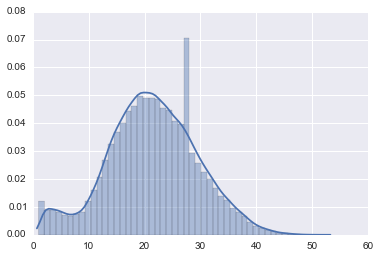

In [163]:
fi = set(list(fi2.sort_values(ascending=False)[:50].index) + list(fi3.sort_values(ascending=False)[:50].index))
# fi = set([f for f in features[:300] if f.startswith("A:")])
print fi
selected_ind = [i for i, f in enumerate(features) if f in fi]
selected_features = features[selected_ind]

y_ind = np.argsort(yp)
x = (X[y_ind[-100000:]][:, selected_ind] > 0).astype(int)
selected_users = users[y_ind[-100000:]]

sns.distplot((x > 0).sum(axis=1))

In [164]:
for (i, j), d in np.ndenumerate(smp.pairwise_distances(x[:1000].T, metric='jaccard')):
    if d < 0.3 and selected_features[i] < selected_features[j]:                            
        print selected_features[i], selected_features[j], d

A:9287 edu:1 0.267184035477
A:9287 emp:1 0.21919302072
A:9287 fam:1 0.285714285714
A:9287 is_male:False 0.251037344398
edu:1 emp:1 0.236111111111
edu:1 fam:1 0.293062200957
emp:1 fam:1 0.283256880734


In [165]:
feature_names = {}
with open('/Users/anokhin/Desktop/features.txt') as ff:
    for line in ff:
        feature_names["A:" + line.split(":")[0]] = line.split(":")[1].strip()
        
for f in selected_features:
    print f, feature_names.get(f, f)

A:10013 Красота и здоровье
A:11452 Видео
A:12920 Есть дети в семье
A:12921 Нет детей в семье
A:7354 Автовладельцы
A:7377 Детские товары
A:7387 Кинофильмы
A:7388 Культурный отдых, афиша
A:7394 Активный отдых
A:7395 Продукты питания
A:7408 Путешественники внутренние
A:7410 Туры и турагентства
A:7414 Вторичная недвижимость
A:7415 Аптеки и лекарства
A:7417 Клиники
A:7421 Все о детях
A:8483 Поиск работы
A:8484 Одежда, обувь и аксессуары
A:8488 Кулинария
A:8493 Финансы и бухгалтерский учет
A:8498 Путешественники зарубежные
A:8552 Беременность и роды
A:8878 Красота и уход за собой
A:8879 Развлечения
A:9075 Административный персонал
A:9076 Банки, инвестиции, лизинг
A:9084 Медицина, фармацевтика
A:9085 Наука, образование
A:9086 Государственная служба, некоммерческие организации
A:9091 Транспорт, логистика
A:9097 Домашний персонал
A:9286 A - Ниже среднего
A:9287 B - Средний
A:9288 C - Выше среднего
A:9304 Подарки
A:9353 Родители дошкольников
A:9354 Родители школьников начальных классов
A:9380 Ро

In [166]:
feature_groups = {
    "A:10013": "girly",
    "A:11452": "video",
    "A:12920": "kids",
    "A:12921": "no_kids",
    "A:7354": "cars",
    "A:7377": "kids",
    "A:7387": "enter",
    "A:7388": "enter",
    "A:7394": "travel",
    "A:7395": "goods",
    "A:7408": "travel",
    "A:7410": "travel",
    "A:7414": "housing",
    "A:7415": "health",
    "A:7417": "health",
    "A:7421": "kids",
    "A:8483": "work",
    "A:8484": "girly",
    "A:8488": "girly",
    "A:8493": "work",
    "A:8498": "travel",
    "A:8552": "kids",
    "A:8878": "girly",
    "A:8879": "enter",
    "A:9075": "work",
    "A:9076": "work",
    "A:9084": "work",
    "A:9085": "work",
    "A:9086": "work",
    "A:9091": "work",
    "A:9097": "work",
    "A:9304": "goods",
    "A:9353": "kids",
    "A:9354": "kids",
    "A:9380": "kids"
}

from  collections import defaultdict, OrderedDict
reverse = defaultdict(list)
for t, n in feature_groups.items():
    reverse[n].append(feature_names[t])

for n, ts in reverse.items():
    print n
    for t in ts:
        print " ", t
        
mz = len(reverse) + sum([1 for f in selected_features if not f.startswith("A:")])
nz = x.shape[0]

w = np.zeros((nz, mz))
compressed_features_ind = OrderedDict()
for i, f in enumerate(selected_features):   
    if f.startswith("A:"):
        if f in feature_groups:
            cf = feature_groups[f]
        else:
            print "Skipping", f
            continue
    else:
        cf = f
        
    if cf not in compressed_features_ind:
        compressed_features_ind[cf] = len(compressed_features_ind)
        
    w[:, compressed_features_ind[cf]] += x[:, i]
    
w = w.astype(bool).astype(int)
    
x = w

kids
  Все о детях
  Есть дети в семье
  Родители дошкольников
  Родители школьников начальных классов
  Беременность и роды
  Родители школьников средних и старших классов
  Детские товары
girly
  Красота и уход за собой
  Кулинария
  Одежда, обувь и аксессуары
  Красота и здоровье
cars
  Автовладельцы
housing
  Вторичная недвижимость
work
  Медицина, фармацевтика
  Наука, образование
  Государственная служба, некоммерческие организации
  Финансы и бухгалтерский учет
  Административный персонал
  Поиск работы
  Домашний персонал
  Транспорт, логистика
  Банки, инвестиции, лизинг
no_kids
  Нет детей в семье
goods
  Подарки
  Продукты питания
health
  Аптеки и лекарства
  Клиники
enter
  Развлечения
  Кинофильмы
  Культурный отдых, афиша
video
  Видео
travel
  Активный отдых
  Путешественники внутренние
  Туры и турагентства
  Путешественники зарубежные
Skipping A:9286
Skipping A:9287
Skipping A:9288


In [167]:
for K in [7]:
    min_j = None
    bestModel = None
    t = 0.5
    for i in xrange(10):
        km = hm.HMedoids(n_clusters=K, threshold=t)
        z = km.fit_predict(x)
        j = km.inertia(x)        
        if min_j is None or j < min_j:
            min_j = j
            bestModel = km
            print "Winner: %d -> %f" % (K, j)

Winner: 7 -> 24569.166667
Winner: 7 -> 24419.700000


(100000,) 100000


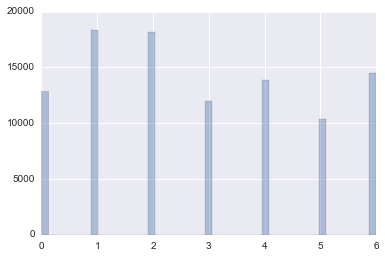

In [168]:
z = bestModel.predict(x)
sns.distplot(z, kde=False)
print z.shape, len(selected_users)
res = pd.Series(z, index=selected_users)
res.to_csv('/Users/anokhin/Desktop/clust.txt')

In [169]:
clust = pd.DataFrame(km.medoids_.T, index=[feature_names.get(f, f) for f in compressed_features_ind])
fclust = clust[np.logical_and(clust.sum(axis=1) < km.n_clusters, clust.sum(axis=1) > 0)]
fclust

,0,1,2,3,4,5,6
girly,1,1,1,1,1,0,1
video,0,0,0,0,1,0,1
kids,1,1,1,1,1,0,1
no_kids,1,1,0,0,1,0,1
cars,1,0,0,0,1,0,0
enter,1,1,0,1,1,0,1
travel,1,1,1,1,1,0,1
goods,1,0,0,0,0,0,0
health,0,0,0,0,1,0,1
age:20,1,0,0,0,0,0,0


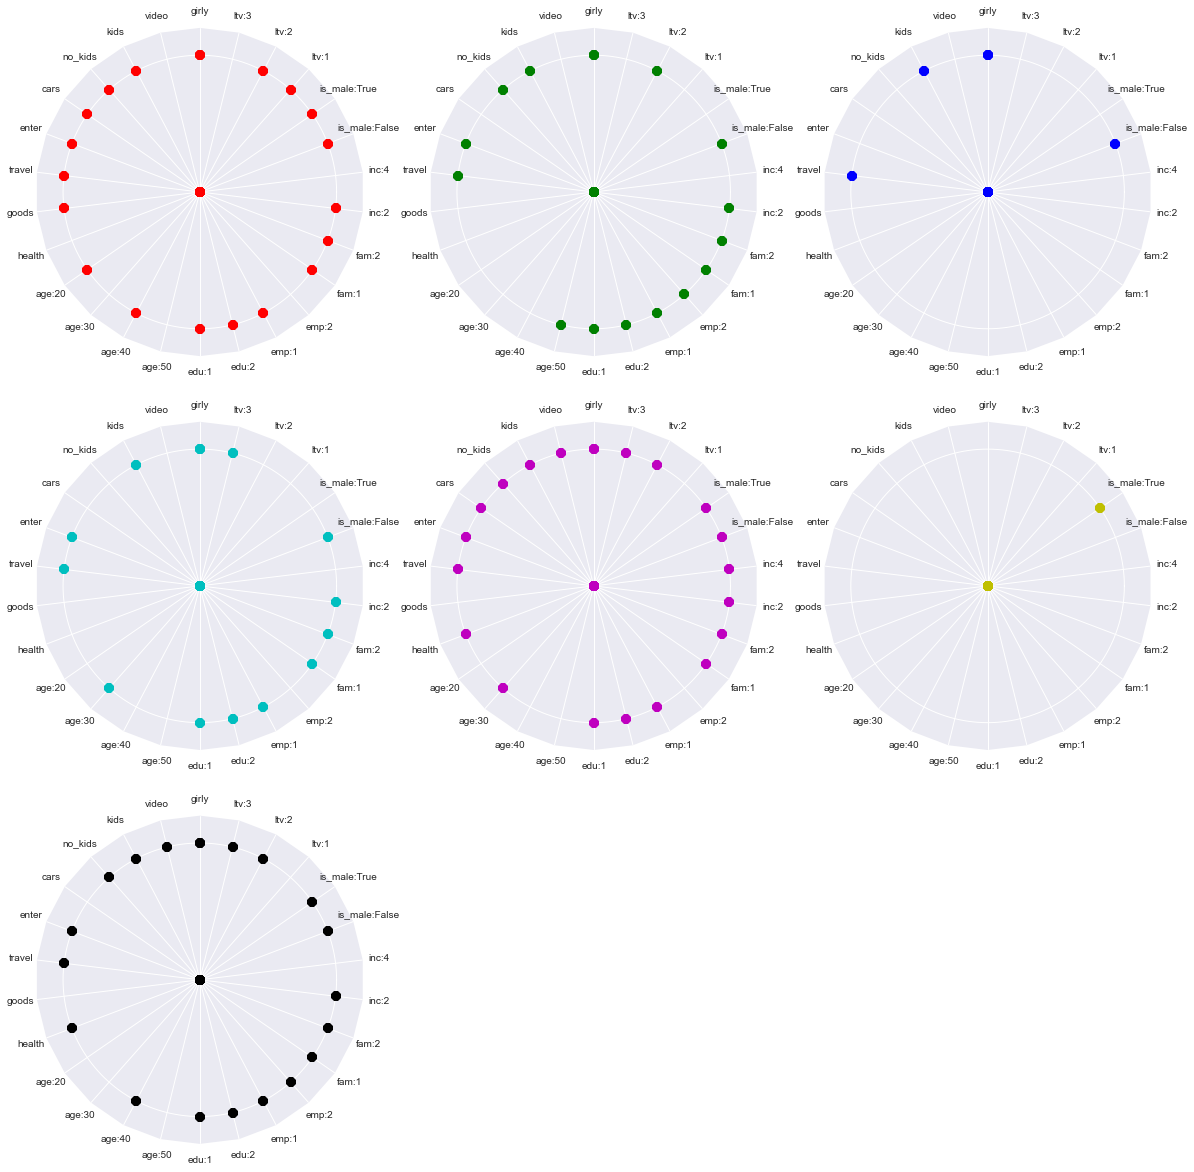

In [172]:
from radar import _radar_factory
from transliterate import translit, get_available_language_codes
import matplotlib.pyplot as plt

names = []
for z in fclust.index:
    if isinstance(z, str):
        try:
            names.append(translit(unicode(z, 'UTF-8'), reversed=True))
        except:
            names.append(z)
    else:
        names.append(z)

N = len(names) 

fig = plt.figure(figsize=(20, 20))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink']

for i in fclust.columns.values:
    ax = fig.add_subplot(3, 3, i + 1, projection='radar')
    theta = _radar_factory(N)
    ax.plot(theta, fclust[i], '8', color=colors[i], markersize=10)
    ax.set_varlabels(names)
    pl.ylim(0, 1.2)
    pl.yticks([1], [])

plt.show()